In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Carregando o dataset do Titanic
df = pd.read_csv('train.csv')

# Exibindo as primeiras linhas do dataframe para verificar os dados 
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
translation_dict = {
    'Name': 'Nome',
    'Age': 'Idade',
    'city': 'Cidade',
    'Pclass': 'Classe',
    'male': 'masculino',
    'famale': 'feminino',
    'Sex': 'Sexo',
    'Survived': 'Sobreviveu'
}
df.rename(columns=translation_dict, inplace=True)

def traduzir(Sexo):
    translation_dict2 = {
        'male': 'masculino',
        'female': 'feminino'
    }
    return translation_dict2.get(Sexo, Sexo)

df['Sexo'] = df['Sexo'].apply(traduzir)
print(df.tail())

#pesquisar a funçao replace (pandas)

     PassengerId  Sobreviveu  Classe  \
886          887           0       2   
887          888           1       1   
888          889           0       3   
889          890           1       1   
890          891           0       3   

                                         Nome       Sexo  Idade  SibSp  Parch  \
886                     Montvila, Rev. Juozas  masculino   27.0      0      0   
887              Graham, Miss. Margaret Edith   feminino   19.0      0      0   
888  Johnston, Miss. Catherine Helen "Carrie"   feminino    NaN      1      2   
889                     Behr, Mr. Karl Howell  masculino   26.0      0      0   
890                       Dooley, Mr. Patrick  masculino   32.0      0      0   

         Ticket   Fare Cabin Embarked  
886      211536  13.00   NaN        S  
887      112053  30.00   B42        S  
888  W./C. 6607  23.45   NaN        S  
889      111369  30.00  C148        C  
890      370376   7.75   NaN        Q  


In [5]:
# Contando a quantidade de homens e mulheres
gender_counts = df['Sexo'].value_counts()
survivors_counts = df['Sobreviveu'].value_counts()
print(gender_counts)
#renomear cabeçalho e substituir os valores (sexo, subrevivencia)
#dados faltantes (dados com nan)
#dizer qual coluna é relevante e qual não é - em relaçao aos dados faltantes que ela apresenta
#toda a analise será em relacao a sobreviveu ou nao sobreviveu
#ao final: quais sao as variaveis importantes para o modelo e quais nao soa

Sexo
masculino    577
feminino     314
Name: count, dtype: int64


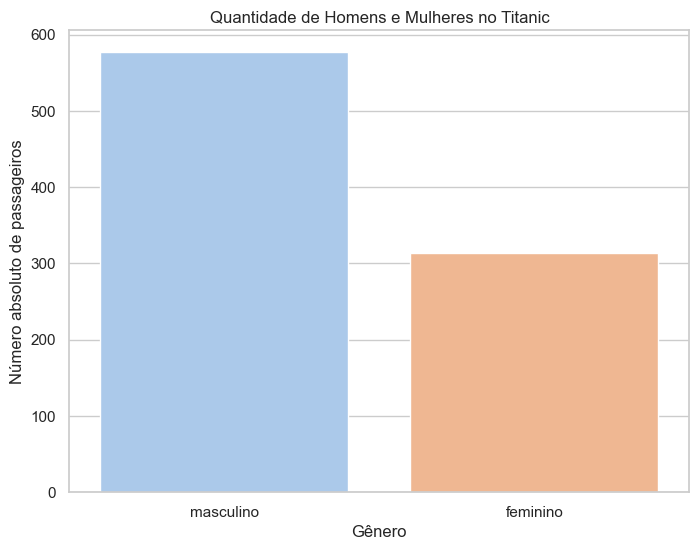

In [6]:
# Criando um gráfico de barras para visualizar a quantidade de homens e mulheres
# Imprimir a percentagem em relação ao gênero
# Criar gráficos de pessoas que morreram em relaçao as que sobreviveram
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
#homens = df.loc[df['Sex'] == 'male']
#mulheres = df.loc[df['Sex'] == 'female']
sns.barplot(x=gender_counts.index, y=gender_counts.values,  palette='pastel')
plt.title('Quantidade de Homens e Mulheres no Titanic')
plt.xlabel('Gênero')
plt.ylabel('Número absoluto de passageiros')
plt.show()


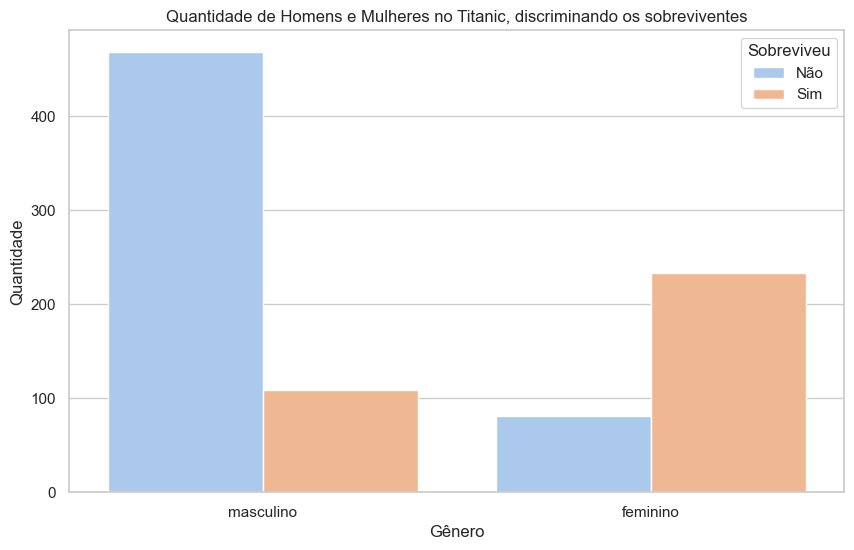

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sexo', hue='Sobreviveu', palette='pastel')
plt.title('Quantidade de Homens e Mulheres no Titanic, discriminando os sobreviventes')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

<Axes: xlabel='Sobreviveu', ylabel='count'>

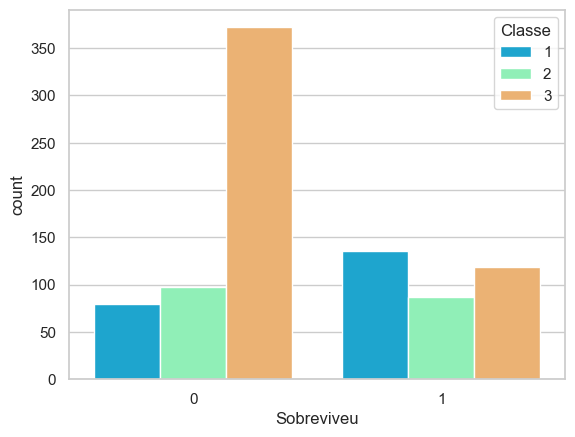

In [8]:

sns.set_style('whitegrid')
sns.countplot(x='Sobreviveu',hue='Classe',data=df,palette='rainbow')

<Axes: xlabel='Idade', ylabel='Count'>

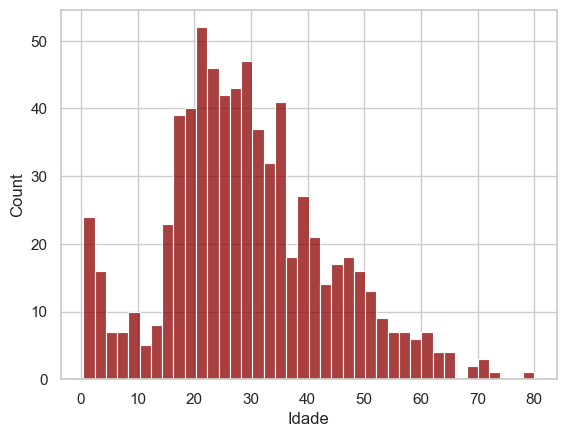

In [9]:
sns.histplot(df['Idade'].dropna(),kde=False,color='darkred',bins=40)
#dados faltantes em idades tratar, mas manter o histograma o mais parecido possível com este da imagem

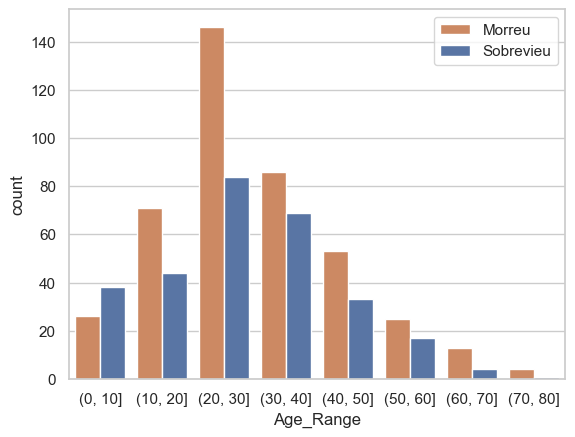

In [10]:
df['Age_Range'] = pd.cut(df.Idade, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Sobreviveu", data = df, palette=["C1", "C0"]).legend(labels = ["Morreu", "Sobrevieu"])

/var/folders/2p/whs20l4n1jz83lyjcvkg92xm0000gn/T/ipykernel_7109/4239331955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Idade'].dropna(),color='darkgreen',bins=30)


<Axes: xlabel='Idade', ylabel='Density'>

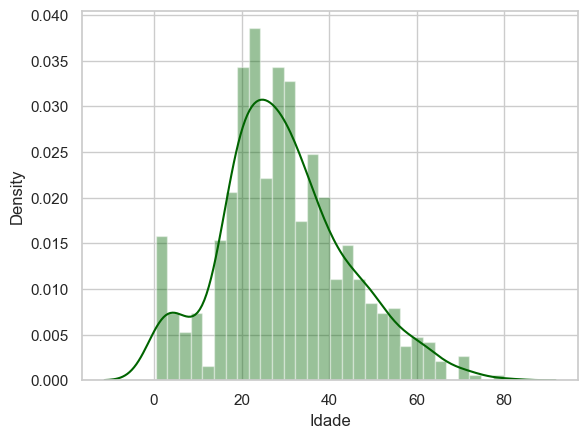

In [11]:
sns.distplot(df['Idade'].dropna(),color='darkgreen',bins=30)

In [12]:
df.describe()

,PassengerId,Sobreviveu,Classe,Idade,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
numero_nans = df['Idade'].isna()#.sum() #funçao para mostrar o numero absolutto dos dados faltantes
print(numero_nans)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Idade, Length: 891, dtype: bool


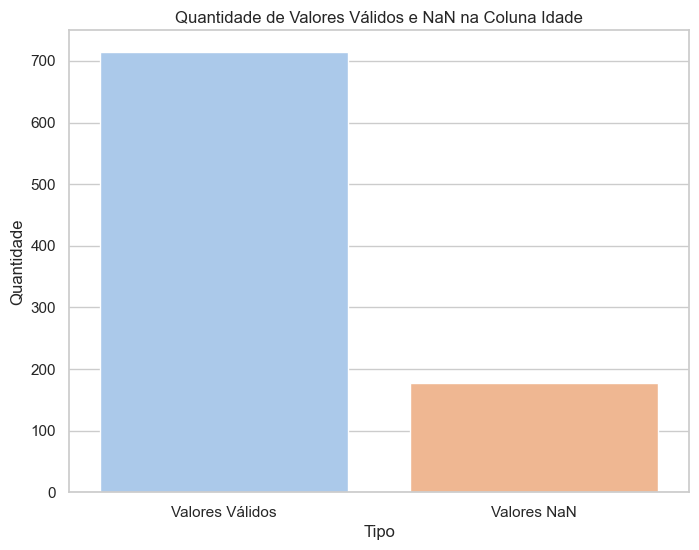

In [14]:
numero_nans = df['Idade'].isna().sum()
numero_validos = df['Idade'].notna().sum()

# Criando um DataFrame para os valores contados
data_contagem = {
    'Tipo': ['Valores Válidos', 'Valores NaN'],
    'Contagem': [numero_validos, numero_nans]
}
df_contagem = pd.DataFrame(data_contagem)

# Configurando o estilo e tamanho do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Criando o gráfico de barras
sns.barplot(x='Tipo', y='Contagem', data=df_contagem, palette='pastel')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Valores Válidos e NaN na Coluna Idade')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()

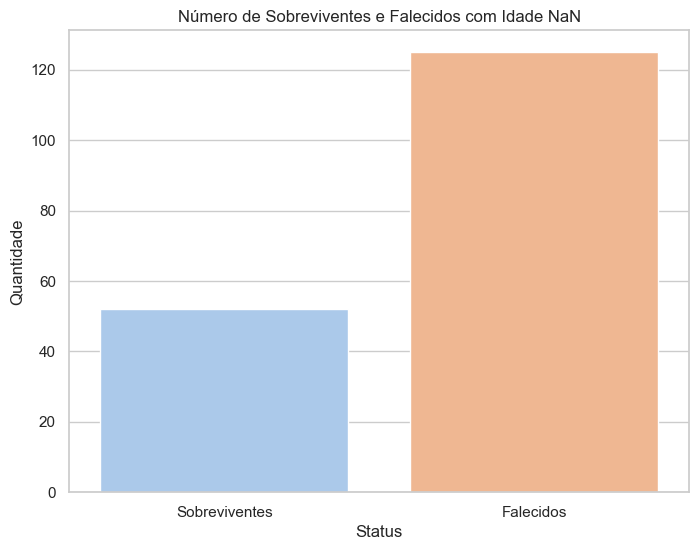

In [15]:
# Filtrando para obter apenas linhas onde 'Idade' é NaN
df_nan = df[df['Idade'].isna()]

# Contando o número de sobreviventes e não sobreviventes entre os NaNs
contagem_sobreviventes = df_nan['Sobreviveu'].sum()
contagem_falecidos = len(df_nan) - contagem_sobreviventes

# Criando um DataFrame para as contagens
data_contagem = {
    'Status': ['Sobreviventes', 'Falecidos'],
    'Contagem': [contagem_sobreviventes, contagem_falecidos]
}
df_contagem = pd.DataFrame(data_contagem)

# Configurando o estilo e tamanho do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Criando o gráfico de barras
sns.barplot(x='Status', y='Contagem', data=df_contagem, palette='pastel')

# Adicionando título e rótulos aos eixos
plt.title('Número de Sobreviventes e Falecidos com Idade NaN')
plt.xlabel('Status')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()

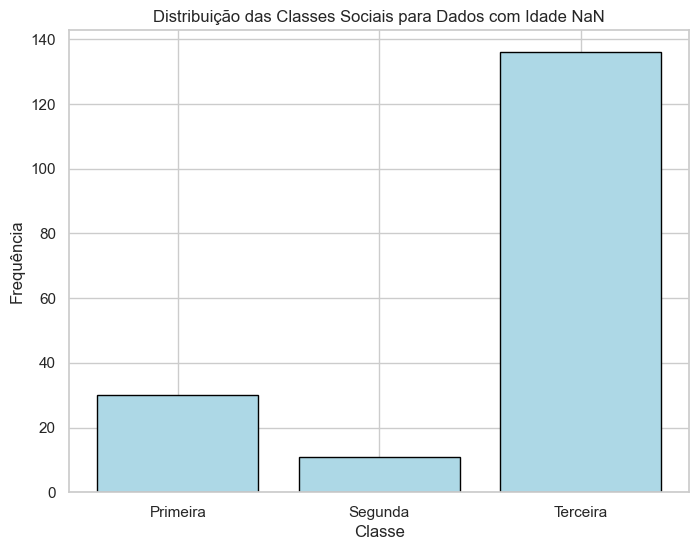

In [16]:
df_nan = df[df['Idade'].isna()]

# Configurando o gráfico
plt.figure(figsize=(8, 6))

# Plotando histograma das classes sociais
plt.hist(df_nan['Classe'], bins=np.arange(0.5, 4.5, 1), edgecolor='black', color='lightblue', rwidth=0.8)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Classes Sociais para Dados com Idade NaN')
plt.xlabel('Classe')
plt.ylabel('Frequência')

# Ajustando os ticks do eixo x
plt.xticks(ticks=np.arange(1, 4), labels=['Primeira', 'Segunda', 'Terceira'])

# Exibindo o gráfico
plt.grid(True)
plt.show()

Agora deve-se colocar a média dos passgeiros da terceira classe em substituíção aos dados preenchidos como 
nan nas células correspondentes às idades.

<Axes: xlabel='Idade', ylabel='Count'>

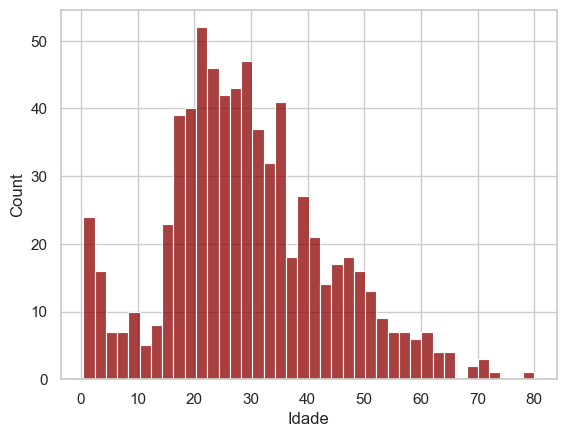

In [17]:
sns.histplot(df['Idade'].dropna(),kde=False,color='darkred',bins=40)

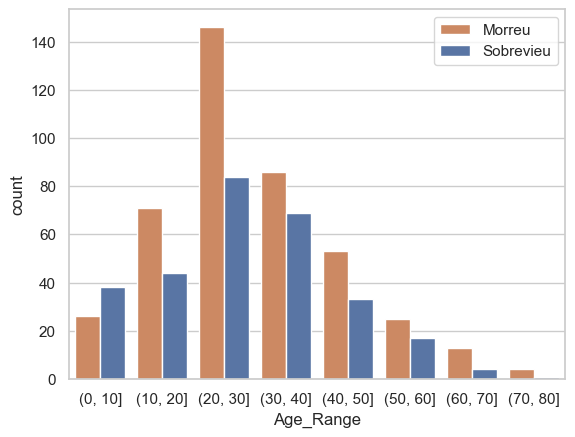

In [18]:
df['Age_Range'] = pd.cut(df.Idade, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Sobreviveu", data = df, palette=["C1", "C0"]).legend(labels = ["Morreu", "Sobrevieu"])

Excluir colunas inúteis do CSV.

Se a pessoa com idade NaN for homem, substituir com a média das idades dos homens e se for mulher com a idade das mulheres. Atentar-se as classes, se for assim, eu poderia ter 3 idades médias para substituir, assim é possível dividir este pico do gráfico em 6.

In [19]:


# Calcular as médias das idades para cada combinação de classe e sexo
medias_idade = df.groupby(['Classe', 'Sexo'])['Idade'].mean()

# Função para preencher as idades NaN com as médias calculadas
def preencher_idade(row):
    if pd.isna(row['Idade']):
        return medias_idade[(row['Classe'], row['Sexo'])]
    else:
        return row['Idade']

# Preencher as idades NaN
df['Idade'] = df.apply(preencher_idade, axis=1)

# Verificar se as idades NaN foram preenchidas
print(df['Idade'].isna().sum())

# Salvar o dataset atualizado
df.to_csv('titanic_preenchido.csv', index=False)
print(medias_idade)


0
Classe  Sexo     
1       feminino     34.611765
        masculino    41.281386
2       feminino     28.722973
        masculino    30.740707
3       feminino     21.750000
        masculino    26.507589
Name: Idade, dtype: float64


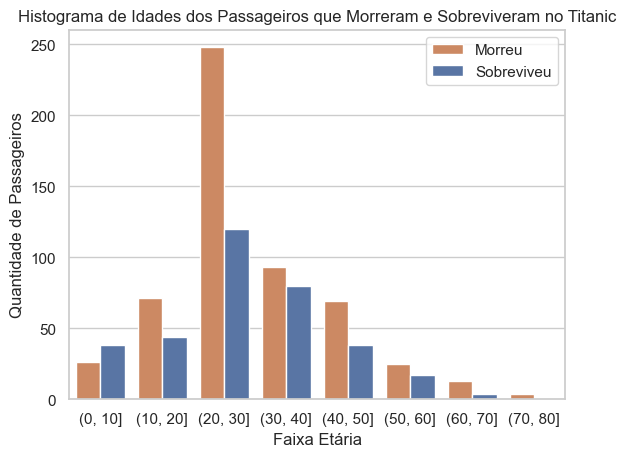

In [20]:
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Gerar o histograma usando countplot
sns.countplot(x='Faixa_Etaria', hue='Sobreviveu', data=df, palette=["C1", "C0"])

# Ajustar as legendas
plt.legend(labels=["Morreu", "Sobreviveu"])

# Adicionar título e rótulos aos eixos
plt.title('Histograma de Idades dos Passageiros que Morreram e Sobreviveram no Titanic')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Passageiros')

# Mostrar o gráfico
plt.show()

<Axes: xlabel='Idade', ylabel='Count'>

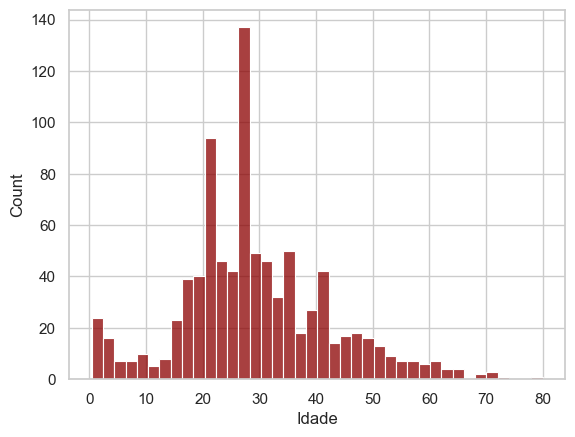

In [21]:
sns.histplot(df['Idade'].dropna(),kde=False,color='darkred',bins=40)

In [22]:
# Calcular as médias das idades para cada combinação de classe, sexo e sobrevivência
medias_idade = df.groupby(['Classe', 'Sexo', 'Sobreviveu'])['Idade'].mean()

# Função para preencher as idades NaN com as médias calculadas
def preencher_idade(row):
    if pd.isna(row['Idade']):
        return medias_idade.loc[(row['Classe'], row['Sexo'], row['Sobreviveu'])]
    else:
        return row['Idade']

# Preencher as idades NaN
df['Idade'] = df.apply(preencher_idade, axis=1)

# Verificar se as idades NaN foram preenchidas corretamente
print(df['Idade'].isna().sum())

# Salvar o dataset atualizado
df.to_csv('titanic_preenchido.csv', index=False)
print(medias_idade)

0
Classe  Sexo       Sobreviveu
1       feminino   0             25.666667
                   1             34.906658
        masculino  0             43.896132
                   1             36.807265
2       feminino   0             36.000000
                   1             28.099228
        masculino  0             33.166868
                   1             17.753613
3       feminino   0             23.329861
                   1             20.170139
        masculino  0             27.043817
                   1             23.084857
Name: Idade, dtype: float64


<Axes: xlabel='Idade', ylabel='Count'>

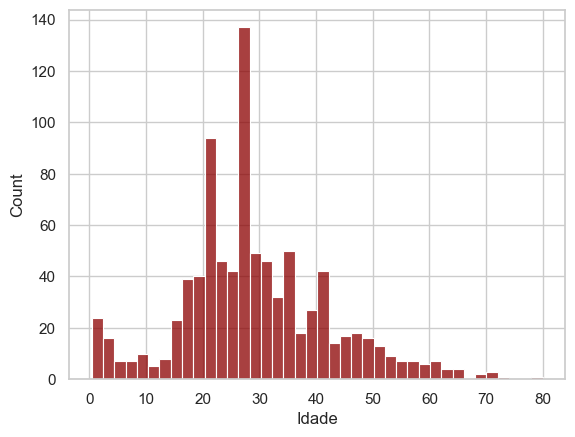

In [23]:
sns.histplot(df['Idade'].dropna(),kde=False,color='darkred',bins=40)

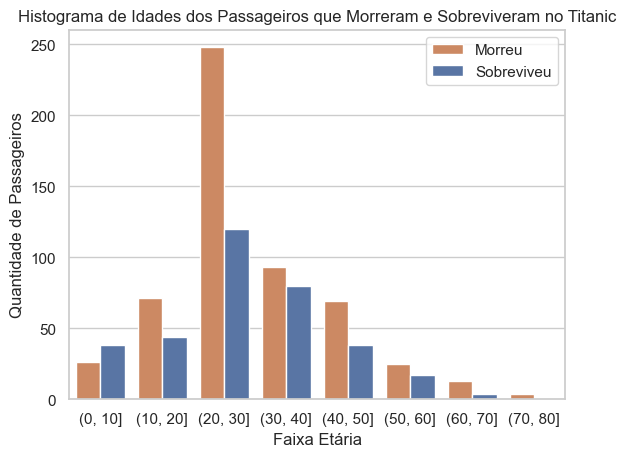

In [24]:
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Gerar o histograma usando countplot
sns.countplot(x='Faixa_Etaria', hue='Sobreviveu', data=df, palette=["C1", "C0"])

# Ajustar as legendas
plt.legend(labels=["Morreu", "Sobreviveu"])

# Adicionar título e rótulos aos eixos
plt.title('Histograma de Idades dos Passageiros que Morreram e Sobreviveram no Titanic')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Passageiros')

# Mostrar o gráfico
plt.show()

In [25]:
print(df.columns)

Index(['PassengerId', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Range',
       'Faixa_Etaria'],
      dtype='object')


In [26]:
# Carregar o dataset
df = pd.read_csv('train.csv')

# Traduzir os nomes das colunas
translation_dict = {
    'Name': 'Nome',
    'Age': 'Idade',
    'Pclass': 'Classe',
    'Sex': 'Sexo',
    'Survived': 'Sobreviveu'
}
df.rename(columns=translation_dict, inplace=True)

# Transformar colunas categóricas em dummies
df = pd.get_dummies(df, columns=['Sexo', 'Classe'], drop_first=True)

# Dividir entre dados com idade e sem idade
df_com_idade = df[df['Idade'].notna()]
df_sem_idade = df[df['Idade'].isna()]

# Definir as features corretas
features = ['Classe_2', 'Classe_3', 'Sexo_male', 'Parch', 'SibSp', 'Fare', 'Sobreviveu']
X = df_com_idade[features]
y = df_com_idade['Idade']

# Treinar o modelo de regressão
reg = LinearRegression().fit(X, y)

# Prever as idades faltantes
df.loc[df['Idade'].isna(), 'Idade'] = reg.predict(df_sem_idade[features])

# Verificar se as idades NaN foram preenchidas corretamente
print(df['Idade'].isna().sum())

# Salvar o dataset atualizado
df.to_csv('titanic_preenchido.csv', index=False)


0


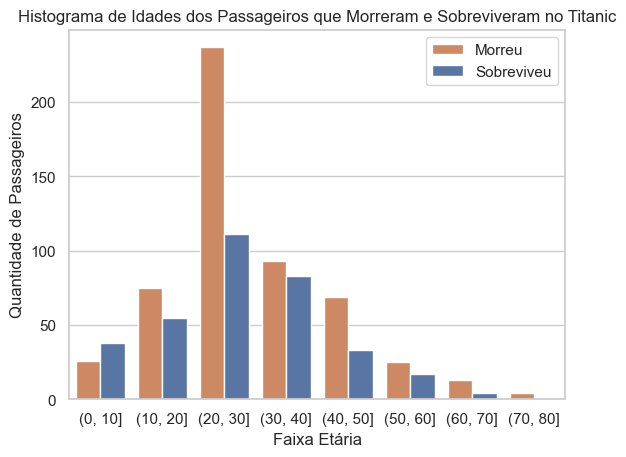

In [27]:
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Gerar o histograma usando countplot
sns.countplot(x='Faixa_Etaria', hue='Sobreviveu', data=df, palette=["C1", "C0"])

# Ajustar as legendas
plt.legend(labels=["Morreu", "Sobreviveu"])

# Adicionar título e rótulos aos eixos
plt.title('Histograma de Idades dos Passageiros que Morreram e Sobreviveram no Titanic')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Passageiros')

# Mostrar o gráfico
plt.show()

<Axes: xlabel='Idade', ylabel='Count'>

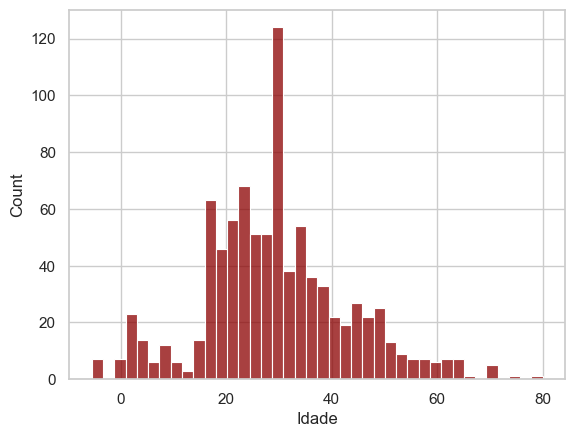

In [28]:
sns.histplot(df['Idade'].dropna(),kde=False,color='darkred',bins=40)

In [29]:
print(df.columns)

Index(['PassengerId', 'Sobreviveu', 'Nome', 'Idade', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sexo_male', 'Classe_2',
       'Classe_3', 'Faixa_Etaria'],
      dtype='object')


In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Carregar os datasets de treino e teste
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Traduzir os nomes das colunas
translation_dict = {
    'Name': 'Nome',
    'Age': 'Idade',
    'Pclass': 'Classe',
    'Sex': 'Sexo',
    'Survived': 'Sobreviveu'
}
train_data.rename(columns=translation_dict, inplace=True)
test_data.rename(columns=translation_dict, inplace=True)

# Função para preencher valores NaN na coluna 'Idade'
medias_idade = train_data.groupby(['Classe', 'Sexo', 'Sobreviveu'])['Idade'].mean()

def preencher_idade(row):
    if pd.isna(row['Idade']):
        return medias_idade.get((row['Classe'], row['Sexo'], 0), 0)  # default 0 se não encontrar
    else:
        return row['Idade']

train_data['Idade'] = train_data.apply(preencher_idade, axis=1)
test_data['Idade'] = test_data.apply(preencher_idade, axis=1)

# Verificar valores NaN em train_data e test_data
print("Valores NaN em train_data:", train_data.isna().sum())
print("Valores NaN em test_data:", test_data.isna().sum())

# Preparar os dados para o modelo
features = ['Classe', 'Sexo', 'SibSp', 'Parch', 'Fare']

# Criar variáveis dummy para os dados de treino e teste
X_train = pd.get_dummies(train_data[features])
y_train = train_data['Sobreviveu']

X_test = pd.get_dummies(test_data[features])

# Garantir que as colunas de X_test estejam alinhadas com X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Verificar e tratar valores NaN em X_train e X_test
print("Valores NaN em X_train:", X_train.isna().sum())
print("Valores NaN em X_test:", X_test.isna().sum())

# Imputar valores NaN com a média (ou outro valor apropriado)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Treinar o modelo
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Salvar os resultados
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Valores NaN em train_data: PassengerId      0
Sobreviveu       0
Classe           0
Nome             0
Sexo             0
Idade            0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Valores NaN em test_data: PassengerId      0
Classe           0
Nome             0
Sexo             0
Idade            0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Valores NaN em X_train: Classe         0
SibSp          0
Parch          0
Fare           0
Sexo_female    0
Sexo_male      0
dtype: int64
Valores NaN em X_test: Classe         0
SibSp          0
Parch          0
Fare           1
Sexo_female    0
Sexo_male      0
dtype: int64
Your submission was successfully saved!


In [31]:
print(test_data.columns)

Index(['PassengerId', 'Classe', 'Nome', 'Sexo', 'Idade', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
